# Description

It takes GLSPhenoplier results on a random phenotype and verifies that the QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [3]:
GLS_NULL_SIMS_DIR <- Sys.getenv("PHENOPLIER_RESULTS_GLS_NULL_SIMS")

In [4]:
GLS_NULL_SIMS_DIR

[1] "/opt/data/results/gls/null_sims"

In [5]:
PHENOPLIER_GLS_DIR <- file.path(GLS_NULL_SIMS_DIR, "phenoplier", "gls")

In [6]:
PHENOPLIER_GLS_DIR

[1] "/opt/data/results/gls/null_sims/phenoplier/gls"

# Random pheno 1

Random phenotype 1 has inflation factor of 1

## Load data

In [84]:
glsph <- as.data.frame(read_tsv(file.path(PHENOPLIER_GLS_DIR, "random.pheno1-gls_phenoplier.tsv.gz")))

Rows: 987 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): lv
dbl (2): coef, pvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [85]:
dim(glsph)

[1] 987   3

In [86]:
head(glsph)

,lv,coef,pvalue
,<chr>,<dbl>,<dbl>
1,LV1,0.006813313,0.29130029
2,LV10,0.018938305,0.06580624
3,LV100,0.008386516,0.24307826
4,LV101,-0.006642441,0.69891352
5,LV102,-0.002702554,0.58449877
6,LV103,-0.015888655,0.89316033


In [87]:
glsph %>%
  filter(pvalue <= 0.05) %>%
  dim_desc()

[1] "[61 x 3]"

## QQ-plot

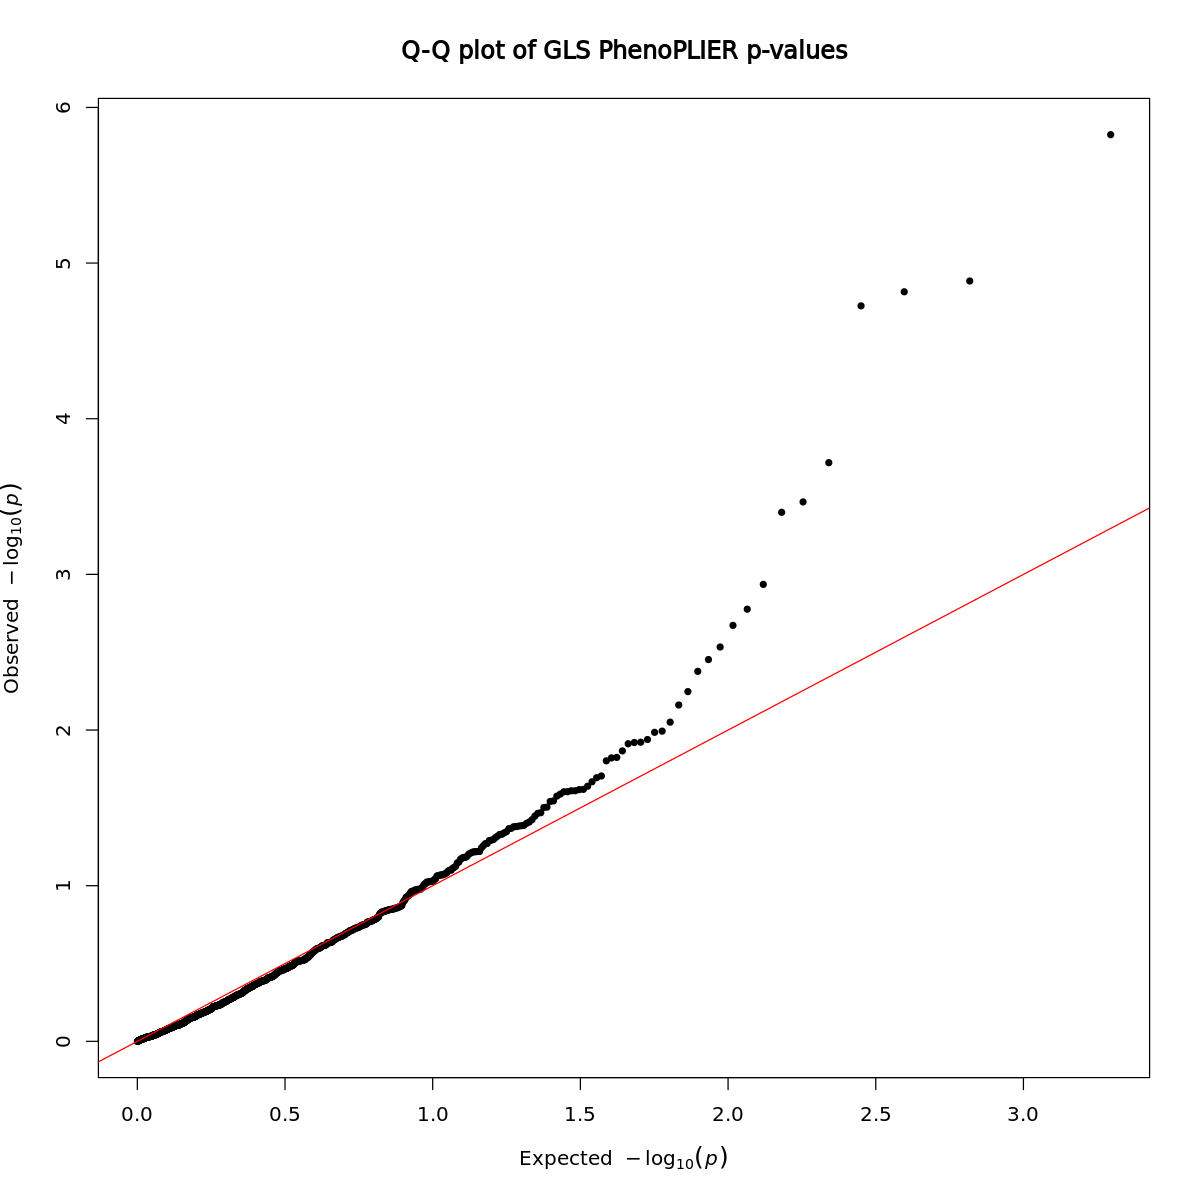

In [88]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(glsph$pvalue, main = "Q-Q plot of GLS PhenoPLIER p-values")

# Random pheno 28

Random phenotype 28 has the largest inflation factor in the original GWAS summary stats (although within the acceptable limits).

## Load data

In [80]:
glsph <- as.data.frame(read_tsv(file.path(PHENOPLIER_GLS_DIR, "random.pheno28-gls_phenoplier.tsv.gz")))

Rows: 987 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): lv
dbl (2): coef, pvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [81]:
dim(glsph)

[1] 987   3

In [82]:
head(glsph)

,lv,coef,pvalue
,<chr>,<dbl>,<dbl>
1,LV1,-5.254291e-04,0.516892362
2,LV10,-9.813011e-06,0.500311451
3,LV100,-2.176322e-02,0.964564108
4,LV101,2.983236e-02,0.009638808
5,LV102,-5.879476e-03,0.678674867
6,LV103,-7.572772e-03,0.723164334


## QQ-plot

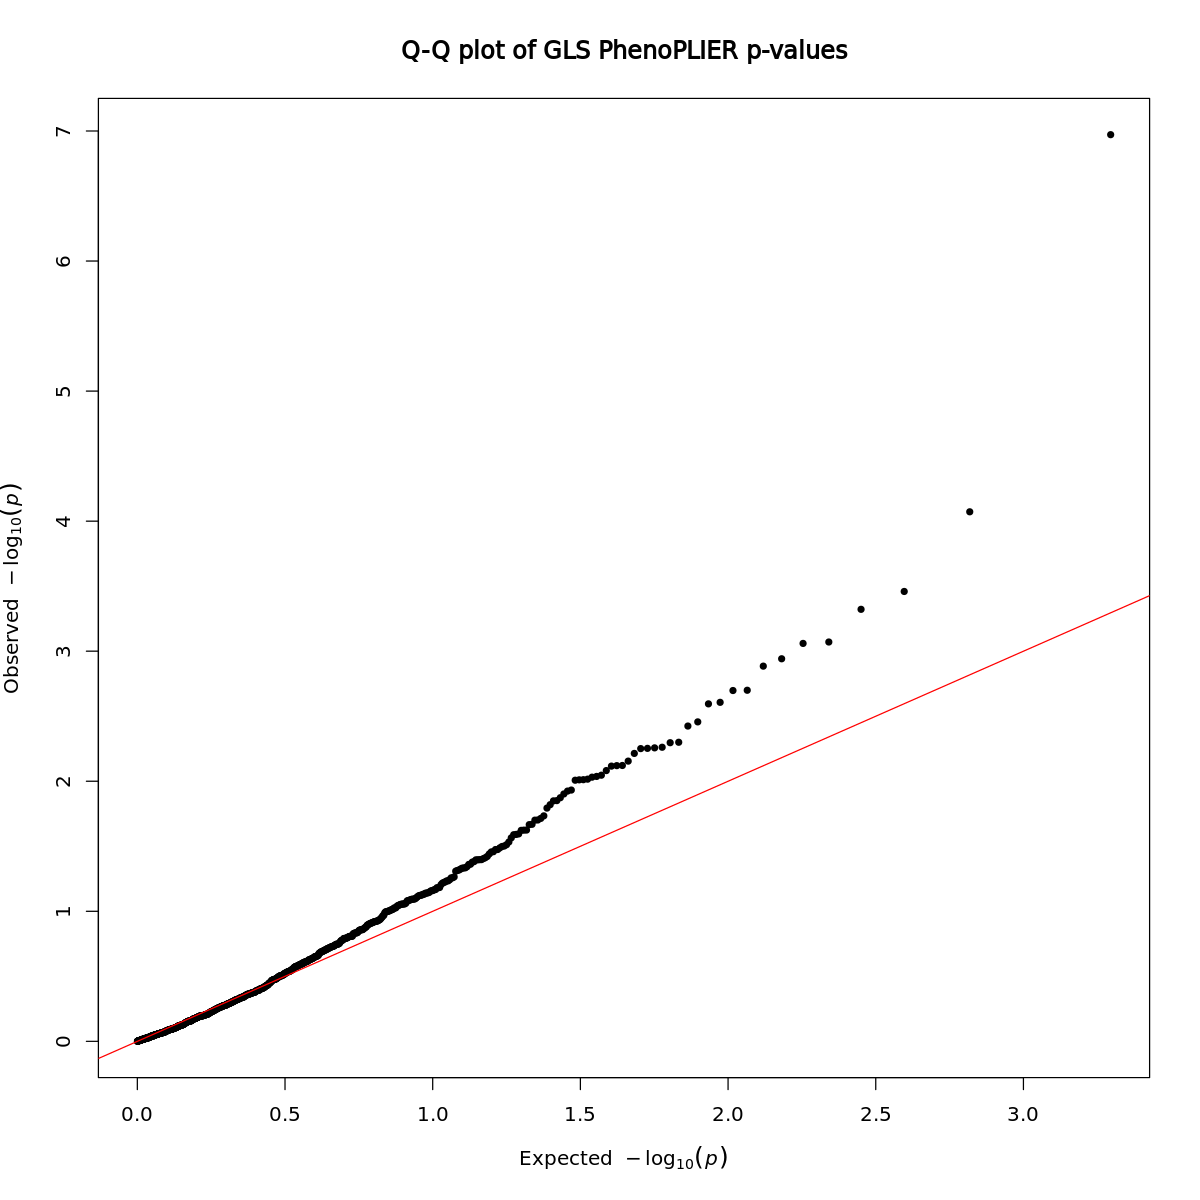

In [83]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(glsph$pvalue, main = "Q-Q plot of GLS PhenoPLIER p-values")